# CASE STUDY - BREAST CANCER DETECTION

### STEP 1. PROBLEM STATEMENT

- Predicting if the cancer diagnosis is benign or malignant based on several observations/features 
- 30 features are used, examples:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign
- Target class:
         - Malignant
         - Benign


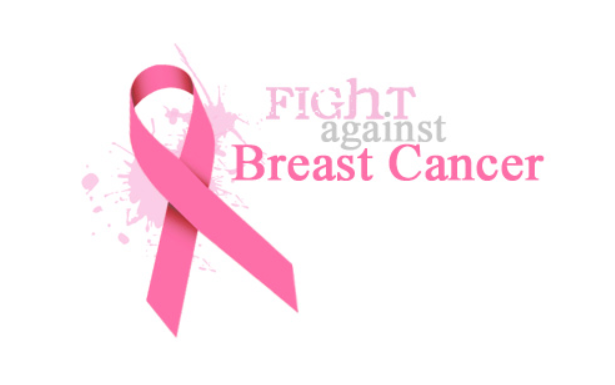

### STEP 2.  IMPORTING LIBRARIES

In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### STEP 3. IMPORTING DATASET

##### Importing Dataset - Sklearn

In [2]:
#Import cancer data drom the Sklearn library

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
type(cancer)

sklearn.utils.Bunch

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
print(cancer['target_names'])

['malignant' 'benign']


In [7]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [8]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
cancer['data'].shape

(569, 30)

##### Creating DataFrame 

In [10]:
#Creating DataFrame - Simplicity

df_cancer = pd.DataFrame(data = np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [11]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


##### Checking Null Values

In [12]:
df_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### STEP 4. DATA VISUALIZATION & FEATURE SELECTION

##### Target Class

Number of Benign:  357
Number of Malignant :  212


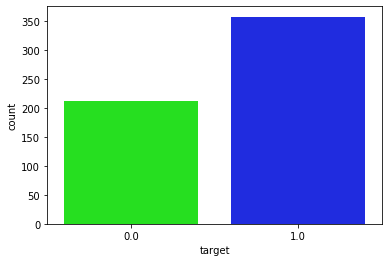

In [13]:
#print(df_cancer.target.value_counts())

#plt.figure(figsize=(6,6))
#sns.countplot(x='target', data=df_cancer, palette='hsv')
#plt.show()


sns.countplot(x = 'target', data = df_cancer, palette = 'hsv')       
B, M = df_cancer['target'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

As we can see from the above plot we have more cases registered for Benign tumor as compared to Malignant tumor

##### Heat Map - Correlation

(31.0, 0.0)

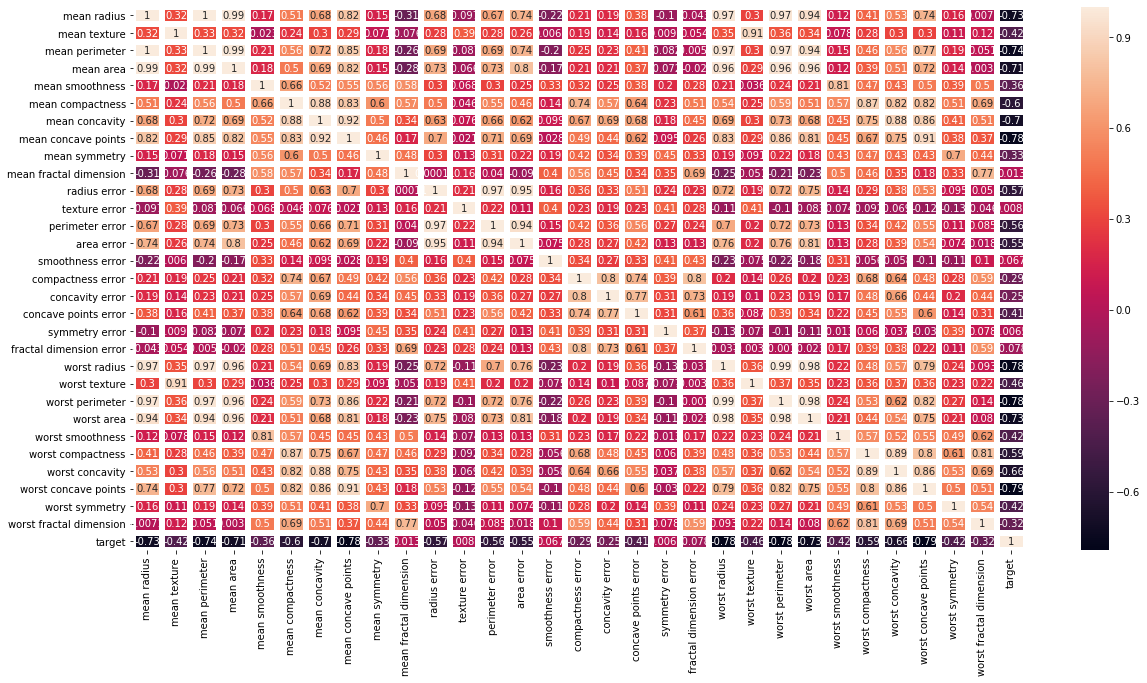

In [14]:
#We plot the heat map so that we can remove multi colinearity which means the columns which are depending on each other 
#should be avoided because what is the use of using same column twice.

plt.figure(figsize=(20,10))
ax = sns.heatmap(data=df_cancer.corr(), linewidths=5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Observations:

- mean radius, mean perimeter, mean area are highly co-related so out of them we can use any one thing.


- mean compactness, mean concavity, mean concave points are related to eachother so we will consider only mean compactness


Conclusion: We will only include following features 

- mean radius
- mean texture
- mean smoothness
- mean compactness
- mean symmetry
- mean fractal dimension

Ref: https://www.kaggle.com/gargmanish/basic-machine-learning-with-cancer 

In [15]:
prediction_var = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean symmetry', 'mean fractal dimension']

#Now above variables will be used for prediction.

In [16]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [17]:
df_cancer_new = pd.DataFrame(data = df_cancer, columns = prediction_var)

In [18]:
df_cancer_new.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883


In [19]:
df_cancer_new.insert(loc = 6, column = 'target', value = df_cancer['target'])

In [20]:
df_cancer_new.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,target
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.0
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.0
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.0
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.0
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.0


(7.0, 0.0)

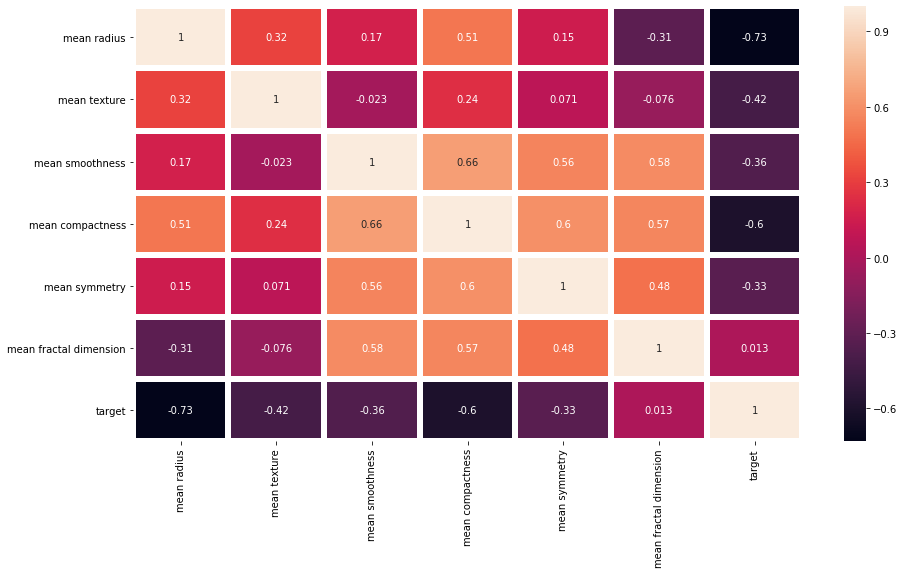

In [21]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(data=df_cancer_new.corr(), linewidths=5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Now we can see the columns are not dependent on eachother and we have obtain proper feature selection

### STEP 5 - MODEL TRAINING

##### Splitting Data - Independent & Dependent Variables

In [22]:
df_cancer_new.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,target
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.0
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.0
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.0
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.0
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.0


In [23]:
#X = df_cancer_new.drop[['target'], axis = 1, inplace = True]

X = df_cancer_new.iloc[:, 0:6]
y = df_cancer_new.iloc[:, 6]

In [24]:
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883


In [25]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

##### Splitting Data - Training & Test Set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [27]:
X_train.shape

(398, 6)

In [28]:
X_test.shape

(171, 6)

##### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##### Building Model

In [30]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### STEP 6 - EVALUATING MODEL

##### Predicting Targets 

In [31]:
y_predict = svc_model.predict(X_test)

##### Accuracy

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("The Accuracy_Score is:", accuracy_score(y_test, y_predict) * 100)

The Accuracy_Score is: 94.73684210526315


##### Classification Report & Confusion Matrix


In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print("\t\t\tCLASSIFICATION REPORT:\n")
print(classification_report(y_test, y_predict))

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test.values.flatten(), y_predict, rownames=['Actual'], colnames = ['Predicted']))

			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93        61
         1.0       0.96      0.95      0.96       110

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

			CONFUSION MATRIX:

Predicted  0.0  1.0
Actual             
0.0         57    4
1.0          5  105


(2.0, 0.0)

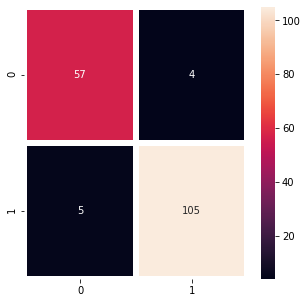

In [65]:
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, linewidths=5, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Our moto is to make a generalized model rather than overfitted model so in future whenever we get images just by looking at it or analyzing it characterstic via model we can tell it is beign or malignant even if images have'nt been seen during training. We can acheive this by building confusion matrix and check

### STEP 7 - IMPROVING MODEL 

SVM Parameter Optimization

- C parameter: Controls the tradoff in classifying the points and having a kind of smooth boundary. Large value of C results in choosing small margin hyperplane. Less value of C results in choosing high margin hyperplane which could result is miss classifying the data points. 


- Gamma: Defines how far the influence of single training set reaches. High Gamma Value results in close reach which implies we are focused on the points close to the hyperplane and far more points are ignored which results in overfitting. Low Gamma Value results in far reach which results in generalised solution.


- We would be using Grind Search approach which will tell us teh best parameter values for our model which can somehoe improve our accuracy more better and reduce TYPE 1 and TYPE 2 error which we can see in confusion matrix.

Ref: https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

In [58]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [59]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.627, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.644, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.918, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.909, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [60]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [62]:
grid_predictions = grid.predict(X_test)

(2.0, 0.0)

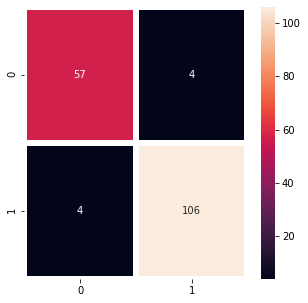

In [64]:
cm = confusion_matrix(y_test, grid_predictions)

plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, linewidths=5, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

We can see from the heatmap we have reduced the Type 2 error 

In [66]:
#Accuracy

print("The Accuracy_Score is:", accuracy_score(y_test, grid_predictions) * 100)

The Accuracy_Score is: 95.32163742690058


### STEP 8 - CONCLUSION

- Machine Learning Technique was able to classify the tumors as Malignant/Benign with 95% accuracy 


- We created our own features from the inbuild data and provide dtou our machine learning model. We also applied Feature Engineering along with Feature Scaling and Grid Search CV to improve our model's accuracy and reduce the TYPE 1 and TYPE 2 error.


- This technique can be be further improved combining Deep Learning Techniques to directly classify the cancer from tissues images.